# GDP and life expectancy - Answers - Habiba Sarhan

Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2013 and the life expectancy of people born in that country in 2013.

# Extend the project
Make a copy of the Project Notebook: GDP and Life expectancy and change it to answer one or more of the following questions:



## To what extent do the ten countries with the highest GDP coincide with the ten countries with the longest life expectancy?

In [14]:
HighGDP = gdpClean.sort_values(GDP).tail(10)
HighGDP

,country,GDP (£m)
120,India,1189826
191,Russian Federation,1328647
127,Italy,1363486
60,Brazil,1528714
236,United Kingdom,1733354
100,France,1795953
105,Germany,2393529
129,Japan,3143957
74,China,6065182
237,United States,10715999


In [16]:
LongLife = lifeClean.sort_values(LIFE).tail(10)
LongLife

,country,Life expectancy (years)
201,Singapore,82
126,Israel,82
127,Italy,82
209,Spain,82
44,Australia,82
218,Sweden,82
119,Iceland,83
219,Switzerland,83
129,Japan,83
117,"Hong Kong SAR, China",84


In [18]:
pd.merge(HighGDP, LongLife, on = 'country', how = 'inner')

,country,GDP (£m),Life expectancy (years)
0,Italy,1363486,82
1,Japan,3143957,83


#### The above table shows that Italy and Japan score high in GDP and Life expectancy.

## Which are the two countries in the right half of the plot (higher GDP) with life expectancy below 60 years?

In [19]:
gdpVsLife[(gdpVsLife[GDP] > 10**5) & (gdpVsLife[LIFE] < 60)]


,country,GDP (£m),Life expectancy (years)
124,Nigeria,329100,52
152,South Africa,234056,57


#### As evident from the plot and the table Nigera and South Africa are the two countries in the right half of the plot with higher GDP and life expectancy below 60 years. 

## What factors could explain their lower life expectancy compared to countries with similar GDP? Hint: use the filtering techniques you learned in Week 2 to find the two countries.

In [44]:
gdpVsLife[(gdpVsLife[GDP] > 175000) & (gdpVsLife[GDP] < 375000)].sort_values(LIFE)

,country,GDP (£m),Life expectancy (years)
124,Nigeria,329100,52
152,South Africa,234056,57
36,Colombia,242888,74
165,Thailand,268517,74
104,Malaysia,206639,75
77,"Iran, Islamic Rep.",326963,75
133,Poland,334912,77
175,United Arab Emirates,247444,77
46,Denmark,214650,80
15,Belgium,333214,80


#### The above table shows that Nigera and South Africa are the only two countries located in Africa, whereas the rest and according to our filter criteria are located in different continents. This could be explain due to the poor health care system in Africa.

# Redo the analysis using the countries’ GDP per capita (i.e. per inhabitant) instead of their total GDP. If you’ve done the workbook task, you already have a column with the population data.

Hint: write an expression involving the GDP and population columns, as you learned in Calculating over columns in previous modules. Think about the units in which you display GDP per capita.
Redo the analysis using the indicator suggested at the end of the project notebook.

## Getting the data

Two datasets of the World Bank are considered. One dataset, available at <http://data.worldbank.org/indicator/NY.GDP.MKTP.CD>, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at <http://data.worldbank.org/indicator/SP.DYN.LE00.IN>, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in March 2016.

In [22]:
import pandas as pd

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_csv('WB LE 2013.csv')

POPULATION_INDICATOR = 'SP.POP.TOTL'
popReset = pd.read_csv("WB POP 2013.csv")
popReset.head()

,country,year,SP.POP.TOTL
0,Arab World,2013,3.770967e+08
1,Caribbean small states,2013,6.975819e+06
2,Central Europe and the Baltics,2013,1.037137e+08
3,East Asia & Pacific (all income levels),2013,2.248867e+09
4,East Asia & Pacific (developing only),2013,2.006073e+09


#### Lets clean the data. Now we will remove the first 47 rows in the dataframes. Why 47 rows? Because we are interested in countries and the first rows are a group of countries like the Arab World or Central Europe etc., whereas we are only interested in countries. Lets also remove NaN values in the dataset.

In [25]:
gdpCountries = gdpReset[47:].dropna().reset_index()
lifeCountries = lifeReset[47:].dropna().reset_index()
popCountries = popReset[47:].dropna().reset_index()

### Transforming data: Lets convert the GDP values to GBP and round

In [26]:
def usdToGBP(x):
    return x*0.6038

GDP = 'GDP (£)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP)

COUNTRY = 'country'
gdpAndPop = pd.merge(gdpCountries, popCountries, how = 'inner', on=COUNTRY)

GDP_PC = 'GDP per capita (£)'
POP = ('Population')
gdpAndPop[GDP_PC] = round(gdpAndPop[GDP]/gdpAndPop[POP_INDICATOR])

gdpPC = gdpAndPop[[COUNTRY, GDP_PC]]
gdpPC.head()

,country,GDP per capita (£)
0,"Bahamas, The",13474.0
1,Bahrain,14720.0
2,Bangladesh,576.0
3,Barbados,9150.0
4,Belarus,4663.0


In [27]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = round(lifeCountries[LIFE_INDICATOR])

lifeClean = lifeCountries[[COUNTRY, LIFE]]

gdppcVsLife = pd.merge(gdpPC, lifeClean, how='inner', on=COUNTRY)
gdppcVsLife.head()

,country,GDP per capita (£),Life expectancy (years)
0,"Bahamas, The",13474.0,75.0
1,Bahrain,14720.0,77.0
2,Bangladesh,576.0,71.0
3,Barbados,9150.0,75.0
4,Belarus,4663.0,72.0


In [28]:
from scipy.stats import spearmanr

gdppcColumn = gdppcVsLife[GDP_PC]
lifeColumn = gdppcVsLife[LIFE]
(r, p) = spearmanr(gdppcColumn, lifeColumn)
print('The correlation coefficient is', r)
print('The p-value is', p)

if p < 0.05:
    print('This result is statistically significant.')
else:
    print('This result is not statistically significant.')

The correlation coefficient is 0.8573620476126292
The p-value is 4.5650650263575694e-52
This result is statistically significant.


There is a significant correlation between the GDP per capita and life expectancy.

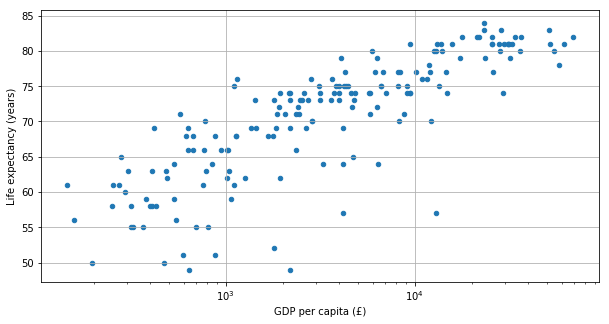

In [29]:
%matplotlib inline

gdppcVsLife.plot(x=GDP_PC, y=LIFE, grid=True, kind='scatter', logx=True, figsize=(10,5))

# To conclude, the graph illustrates the significant corelation between GDP per capita and life expectancy. 

# The End :)

---------------------------------------------------------------------

---------------------------------------------------------------------

In [34]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_csv('WB LE 2013.csv')
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


## Cleaning the data

Inspecting the data with `head()` and `tail()` shows that:

1. the first 34 rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank;
- GDP and life expectancy values are missing for some countries.

The data is therefore cleaned by:
1. removing the first 34 rows;
- removing rows with unavailable values.

In [35]:
gdpCountries = gdpReset[34:].dropna()
lifeCountries = lifeReset[34:].dropna()

## Transforming the data

The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2013 dollar-to-pound conversion rate provided by <http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>. 

In [36]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
34,Afghanistan,2013,2.045894e+10,13075
35,Albania,2013,1.278103e+10,8168
36,Algeria,2013,2.097035e+11,134016
38,Andorra,2013,3.249101e+09,2076
39,Angola,2013,1.383568e+11,88420


The unnecessary columns can be dropped.

In [37]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£m)
34,Afghanistan,13075
35,Albania,8168
36,Algeria,134016
38,Andorra,2076
39,Angola,88420


The World Bank reports the life expectancy with several decimal places. After rounding, the original column is discarded.

In [38]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,country,Life expectancy (years)
34,Afghanistan,60
35,Albania,78
36,Algeria,75
39,Angola,52
40,Antigua and Barbuda,76


## Combining the data

The tables are combined through an inner join on the common 'country' column. 

In [39]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


## Calculating the correlation

To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [40]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer life expectancy, but it is not very strong.

## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

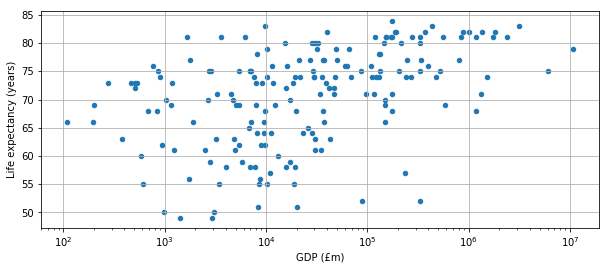

In [41]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (10<sup>4</sup>) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 10<sup>4</sup>), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years. 

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy. 

In [42]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
87,Kiribati,108,66
141,Sao Tome and Principe,195,66
111,"Micronesia, Fed. Sts.",202,69
168,Tonga,277,73
37,Comoros,383,63
157,St. Vincent and the Grenadines,461,73
140,Samoa,509,73
180,Vanuatu,512,72
65,Grenada,538,73
60,"Gambia, The",578,60


In [43]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

,country,GDP (£m),Life expectancy (years)
95,Lesotho,1418,49
160,Swaziland,2916,49
32,Central African Republic,983,50
146,Sierra Leone,3092,50
33,Chad,8276,51
41,Cote d'Ivoire,19998,51
3,Angola,88420,52
124,Nigeria,329100,52
30,Cameroon,18896,55
153,South Sudan,8473,55


## Conclusions

To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

Using the [NY.GDP.PCAP.PP.CD](http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) indicator, GDP per capita in current 'international dollars', would make for a better like-for-like comparison between countries, because it would take population and purchasing power into account. Using more specific data, like expediture on health, could also lead to a better analysis.

## NOW IS YOUR TURN


## GOOD LUCK!